In [1]:
import pandas as pd
import numpy as np

import os
import os.path
import re
import string
import collections
import math
from collections import Counter
import random

frequentwords = ['a', 'all', 'also', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', 'do', 'down', 'even', 'every', 'for', 'from', 'had', 'has', 'have', 'her', 'his', 'if', 'in', 'into', 'is', 'it', 'its', 'may', 'more', 'must', 'my', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'our', 'shall', 'should', 'so', 'some', 'such', 'than', 'that', 'the', 'their', 'then', 'there', 'things', 'this', 'to', 'up', 'upon', 'was', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'would', 'your']

path = '../data/Raw/blogs/blogs/'
files = os.listdir(path)
files.sort() 

df = pd.read_csv('../data/Processed/dataframe_2.csv')
df = df.sort_values('total_words', ascending = False)

Text(0.5, 0, 'Number of Total Words')

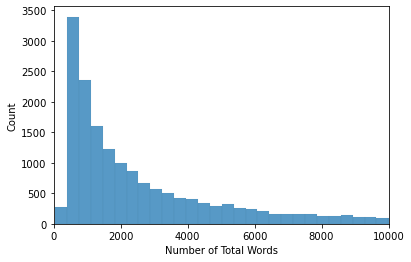

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.histplot(df['total_words'])
plt.xlim(0,10000)
plt.xlabel('Number of Total Words')

In [15]:
import scipy.stats as st
data = df['total_words']
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

#np.mean(df['total_words'])

np.median(df['total_words'])


2106.0

In [18]:
min(df.id)

5114

In [60]:
d1 = df[frequentwords].head(3).T
d1 = (d1-d1.mean())/d1.std()
d1['m'] = d1.sum(axis=1)
d1 = d1.sort_values('m',ascending = False).drop(['m'],axis=1)

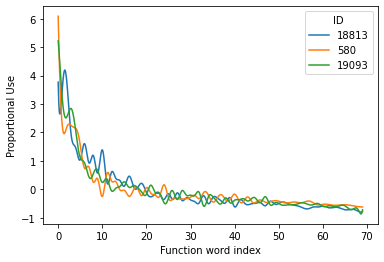

In [77]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

fig, ax = plt.subplots()

for i in d1.columns:
    spline = UnivariateSpline(d1.reset_index().index,d1[i],k=5,s=0.01)
    space = np.linspace(min(d1.reset_index().index),max(d1.reset_index().index),1000)
    fig = plt.plot(space,spline(space))
ax.set_xlabel('Function word index')
ax.set_ylabel('Proportional Use')
plt.legend(title = 'ID', labels = d1.columns)

In [5]:
ts = df[frequentwords]
ts['gender'] = df['gender']
ts = ts.groupby(['gender']).mean().T

ts = (ts-ts.mean())/ts.std()
ts['m'] = ts.sum(axis=1)
ts = ts.sort_values('m',ascending = False).drop(['m'],axis=1)

C:\Users\jonah\AppData\Local\Temp/ipykernel_21796/3075373403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['gender'] = df['gender']


In [6]:
ts

gender,female,male
the,4.499413,5.153032
to,3.587882,3.240606
and,3.268219,2.783087
a,2.252603,2.317734
of,1.640044,1.942401
...,...,...
may,-0.695083,-0.646201
such,-0.703098,-0.664856
must,-0.721081,-0.679102
upon,-0.760535,-0.718663


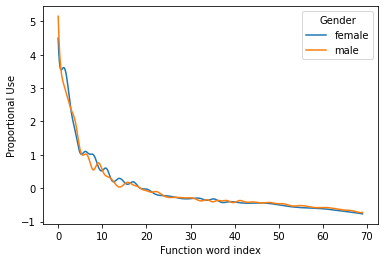

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

fig, ax = plt.subplots()

for i in ts.columns:
    spline = UnivariateSpline(ts.reset_index().index,ts[i],k=5,s=0.01)
    space = np.linspace(min(ts.reset_index().index),max(ts.reset_index().index),1000)
    fig = plt.plot(space,spline(space))
ax.set_xlabel('Function word index')
ax.set_ylabel('Proportional Use')
plt.legend(title = 'Gender', labels = ts.columns)